In [1]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import pandas as pd
import os

In [3]:
#Times Square
#location = (40.76031396987565, -73.98474579011771)

#Washington Sqare Park
#location = (40.72910580638168, -73.99924793023025)

#LIC
#location = (40.7498596199334, -73.94106583446077)

In [2]:
# Define the locations and radius in feet (500 feet = ~152.4 meters)
locations = [
    (40.76031396987565, -73.98474579011771),
    (40.72910580638168, -73.99924793023025),
    (40.7498596199334, -73.94106583446077)
]

#Location 1 = Timesquare, 2 = WSP, 3 = LIC 

In [11]:
radius_meters = 152.4  # approximate conversion of 500 feet to meters

In [6]:
# Function to process a single GeoJSON file and collect results
def process_geojson_file(filepath):
    # Load the GeoJSON file
    gdf = gpd.read_file(filepath)
    
    # Ensure the GeoDataFrame is using EPSG:4326 (WGS 84) CRS initially
    if gdf.crs is None:
        gdf.set_crs(epsg=4326, inplace=True)
    
    # Reproject the GeoDataFrame to EPSG:3857 (meters) for accurate distance measurement
    gdf = gdf.to_crs(epsg=3857)
    
    # Create buffers for each location, reprojected to EPSG:3857
    buffers = []
    for lat, lon in locations:
        point = gpd.GeoSeries([Point(lon, lat)], crs="EPSG:4326")
        point = point.to_crs(epsg=3857)
        buffers.append(point.geometry[0].buffer(radius_meters))
    
    results = []
    
    # Iterate through buffers and find features within each buffer
    for i, buffer in enumerate(buffers):
        lat, lon = locations[i]
        # Find geometries within each buffer radius
        nearby_features = gdf[gdf.intersects(buffer)]
        
        for idx, row in nearby_features.iterrows():
            feature_info = {
                'Location Latitude': lat,
                'Location Longitude': lon,
                'Geometry Type': row.geometry.geom_type,
                **row.drop('geometry').to_dict()  # Extract all non-geometry properties
            }
            results.append((feature_info, row.geometry, buffer))
    
    return results

# Function to create a DataFrame and display the results
def display_geojson_results(filepath):
    # Process the GeoJSON file
    results = process_geojson_file(filepath)
    
    # Convert results to a DataFrame for easier visualization
    processed_results = [r[0] for r in results]  # Extract only the feature information
    df = pd.DataFrame(processed_results)
    
    if not df.empty:
        print(f"Features within 500 feet radius from the given locations in {filepath}:")
        display(df)  # Displays the DataFrame in Jupyter Notebook or similar environment
    else:
        print(f"No features found within 500 feet radius from the given locations in {filepath}.")
    
    return df

In [7]:
# Function to visualize results for each location separately
def visualize_geojson_results(filepath):
    # Process the GeoJSON file and get results
    results = process_geojson_file(filepath)
    
    for i, (result, geom, buffer) in enumerate(results):
        # Create a plot for each location
        fig, ax = plt.subplots(figsize=(8, 8))
        
        # Plot the buffer area
        buffer_gdf = gpd.GeoSeries([buffer], crs="EPSG:3857")
        buffer_gdf.plot(ax=ax, edgecolor='blue', linewidth=1, linestyle='--', alpha=0.5, label=f'Buffer {i+1}')
        
        # Plot the center point
        center_point = Point(locations[i][1], locations[i][0])
        center_point_gdf = gpd.GeoSeries([center_point], crs="EPSG:4326").to_crs(epsg=3857)
        center_point_gdf.plot(ax=ax, color='red', markersize=50, label=f'Location {i+1}')
        
        # Plot the nearby features within the buffer
        feature_gdf = gpd.GeoSeries([geom], crs="EPSG:3857")
        feature_gdf.plot(ax=ax, color='green', edgecolor='black', alpha=0.7, label='Nearby Features')

        # Set plot limits to zoom in to the buffer area
        minx, miny, maxx, maxy = buffer.bounds
        ax.set_xlim(minx, maxx)
        ax.set_ylim(miny, maxy)
        
        # Add legend and title
        plt.legend()
        plt.title(f"Features within 500 feet of Location {i+1}")
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.show()


In [8]:
# CBD
filepath = 'processed/Business Improvement Districts.geojson'  # Replace with your GeoJSON file path
display_geojson_results(filepath)

Features within 500 feet radius from the given locations in processed/Business Improvement Districts.geojson:


,Location Latitude,Location Longitude,Geometry Type,shape_area,objectid_1,f_all_bi_1,f_all_bi_2,f_all_bi_6,shape_leng,id,year_found,f_all_bi_3,f_all_bi_7,objectid_2,f_all_bi_4,shape_ar_1,shape_le_1,f_all_bids
0,40.760314,-73.984746,MultiPolygon,592353.971441,0,Manhattan,Times Square Alliance,14347293.0,0.0,0,1992,752.0,25971343.0,68,https://www.timessquarenyc.org/,3654518.81471,56654.3199639,66.0
1,40.749860,-73.941066,MultiPolygon,0.0,0,Queens,Long Island City Partnership,0.0,0.0,0,2005,0.0,0.0,0,https://www.longislandcityqueens.com/,0.0,0.0,0.0


,Location Latitude,Location Longitude,Geometry Type,shape_area,objectid_1,f_all_bi_1,f_all_bi_2,f_all_bi_6,shape_leng,id,year_found,f_all_bi_3,f_all_bi_7,objectid_2,f_all_bi_4,shape_ar_1,shape_le_1,f_all_bids
0,40.760314,-73.984746,MultiPolygon,592353.971441,0,Manhattan,Times Square Alliance,14347293.0,0.0,0,1992,752.0,25971343.0,68,https://www.timessquarenyc.org/,3654518.81471,56654.3199639,66.0
1,40.749860,-73.941066,MultiPolygon,0.0,0,Queens,Long Island City Partnership,0.0,0.0,0,2005,0.0,0.0,0,https://www.longislandcityqueens.com/,0.0,0.0,0.0


C:\Users\zheng\AppData\Local\Temp\ipykernel_37128\1617132189.py:29: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


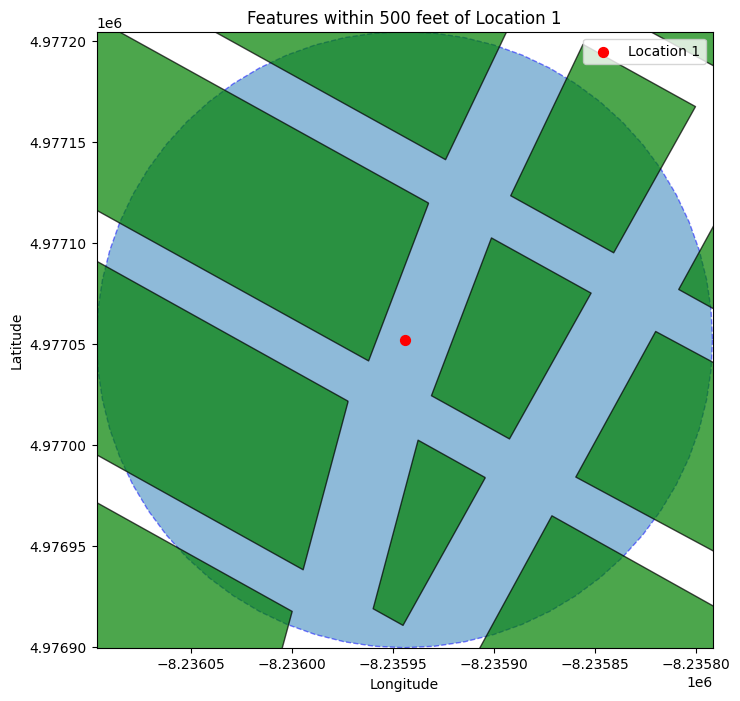

C:\Users\zheng\AppData\Local\Temp\ipykernel_37128\1617132189.py:29: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


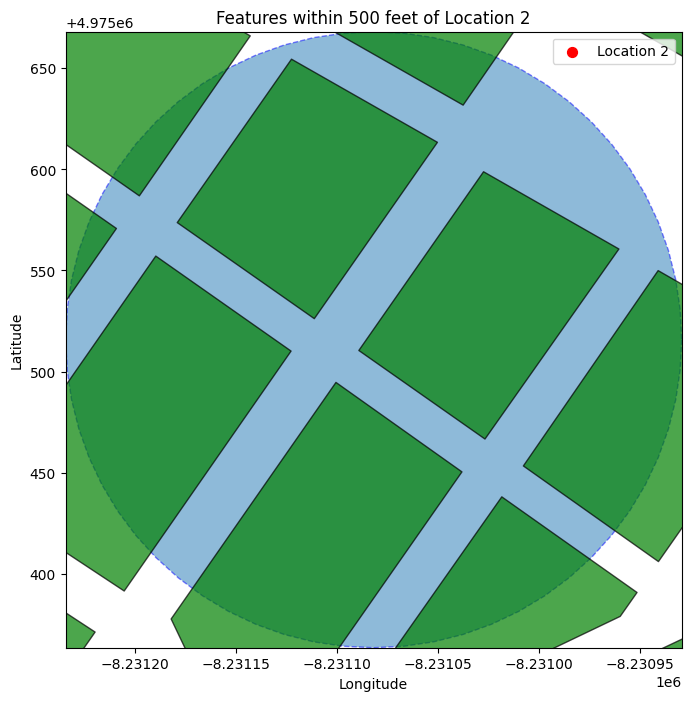

In [9]:
# CBD
filepath = 'processed/Business Improvement Districts.geojson'  # Replace with your GeoJSON file path
visualize_geojson_results (filepath)
#Location 1 = Timesquare, 2 = WSP, 3 =LIC 

In [18]:
# Function to process a single GeoJSON file and collect results
def process_geojson_file(filepath):
    # Load the GeoJSON file
    gdf = gpd.read_file(filepath)
    
    # Ensure the GeoDataFrame has the correct CRS
    if gdf.crs is None:
        gdf.set_crs(epsg=2263, inplace=True)  # Use EPSG:2263 (NAD83 / New York Long Island)
    
    # Reproject the GeoDataFrame to EPSG:3857 (meters) for accurate distance measurement
    gdf = gdf.to_crs(epsg=3857)
    
    results = []
    buffers = []
    
    for lat, lon in locations:
        point = gpd.GeoSeries([Point(lon, lat)], crs="EPSG:4326").to_crs(epsg=3857)
        buffer = point.geometry[0].buffer(radius_meters)
        buffers.append(buffer)
        
        # Find geometries within each buffer radius
        nearby_features = gdf[gdf.intersects(buffer)]
        
        for idx, row in nearby_features.iterrows():
            feature_info = {
                'Location Latitude': lat,
                'Location Longitude': lon,
                'Geometry Type': row.geometry.geom_type,
                **row.drop('geometry').to_dict()  # Extract all non-geometry properties
            }
            results.append((feature_info, row.geometry, buffer))
    
    return results, buffers

# Function to visualize the results for each location separately
def visualize_geojson_results(filepath):
    # Process the GeoJSON file and get results
    results, buffers = process_geojson_file(filepath)
    
    # Iterate over each location and buffer
    for i, (lat, lon) in enumerate(locations):
        fig, ax = plt.subplots(figsize=(8, 8))
        
        # Plot the buffer area
        buffer_gdf = gpd.GeoSeries([buffers[i]], crs="EPSG:3857")
        buffer_gdf.plot(ax=ax, edgecolor='blue', linewidth=1, linestyle='--', alpha=0.5, label='Buffer Area')
        
        # Plot the center point
        center_point = Point(lon, lat)
        center_point_gdf = gpd.GeoSeries([center_point], crs="EPSG:4326").to_crs(epsg=3857)
        center_point_gdf.plot(ax=ax, color='red', markersize=50, label='Center Point')
        
        # Filter features within the current buffer
        relevant_features = [(info, geom) for info, geom, buf in results if buf.equals(buffers[i])]
        
        # Plot the nearby features within the buffer
        for feature_info, geom in relevant_features:
            feature_gdf = gpd.GeoSeries([geom], crs="EPSG:3857")
            feature_gdf.plot(ax=ax, color='green', edgecolor='black', alpha=0.7, label='Nearby Feature')

        # Set plot limits to zoom in to the buffer area
        minx, miny, maxx, maxy = buffers[i].bounds
        ax.set_xlim(minx, maxx)
        ax.set_ylim(miny, maxy)
        
        # Add legend and title
        plt.legend()
        plt.title(f"Features within 500 feet of Location {i+1} ({lat}, {lon})")
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.show()


C:\Users\zheng\AppData\Local\Temp\ipykernel_37128\1761051754.py:67: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


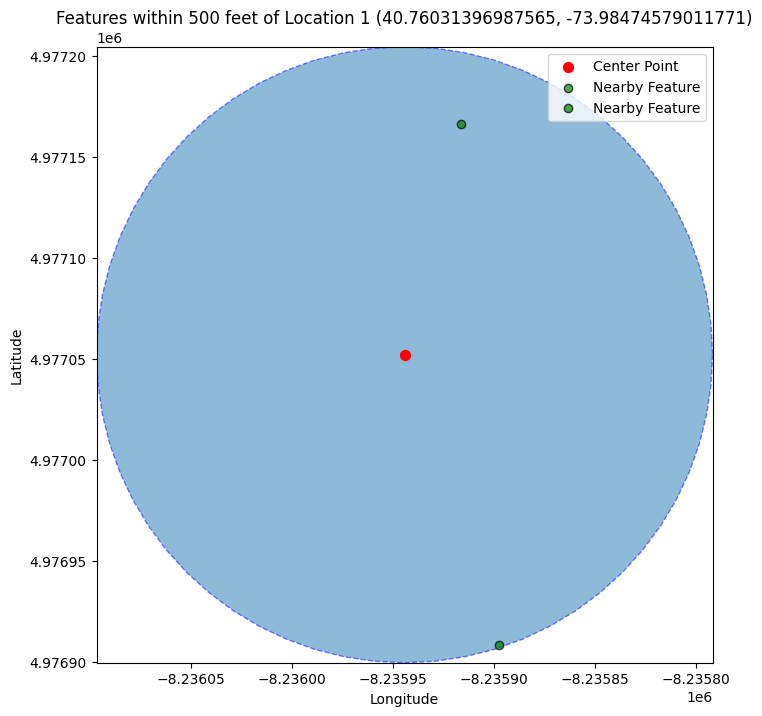

C:\Users\zheng\AppData\Local\Temp\ipykernel_37128\1761051754.py:67: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


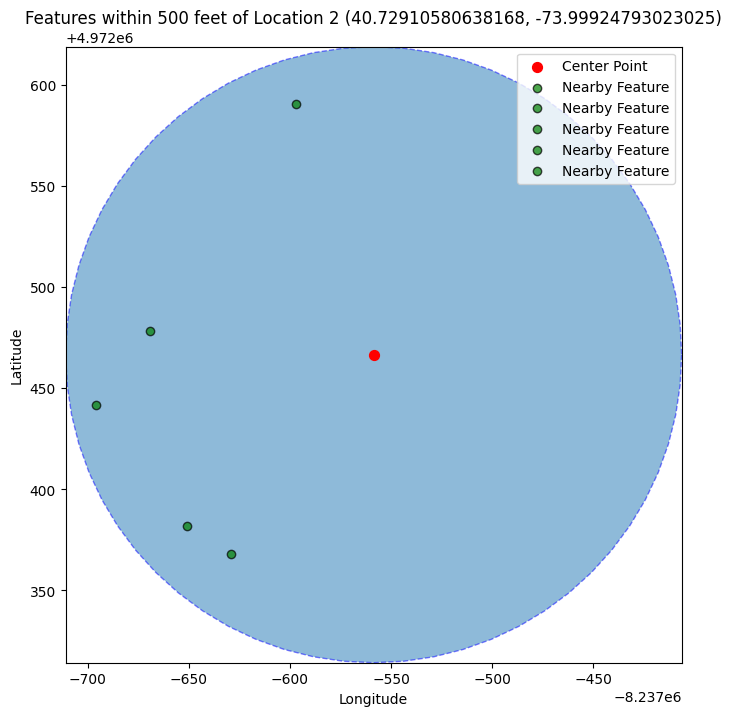

C:\Users\zheng\AppData\Local\Temp\ipykernel_37128\1761051754.py:67: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


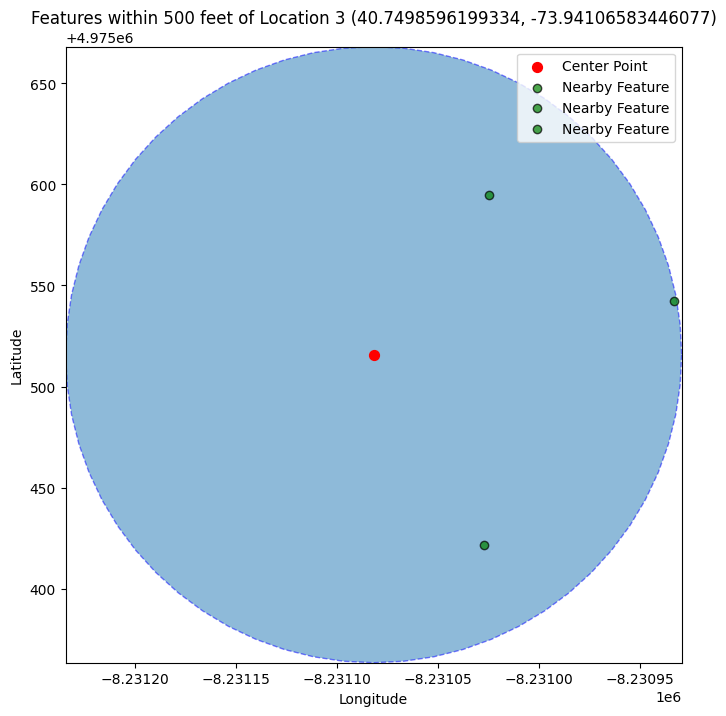

In [11]:
filepath = 'processed/Retail_Stores.geojson'  # Replace with your GeoJSON file path
visualize_geojson_results (filepath)

C:\Users\zheng\AppData\Local\Temp\ipykernel_58772\1761051754.py:67: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


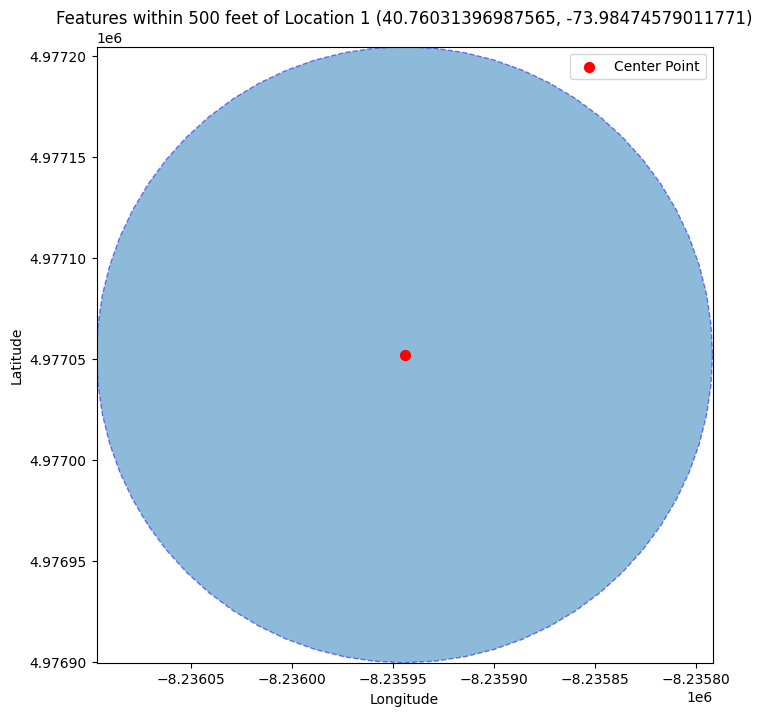

C:\Users\zheng\AppData\Local\Temp\ipykernel_58772\1761051754.py:67: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


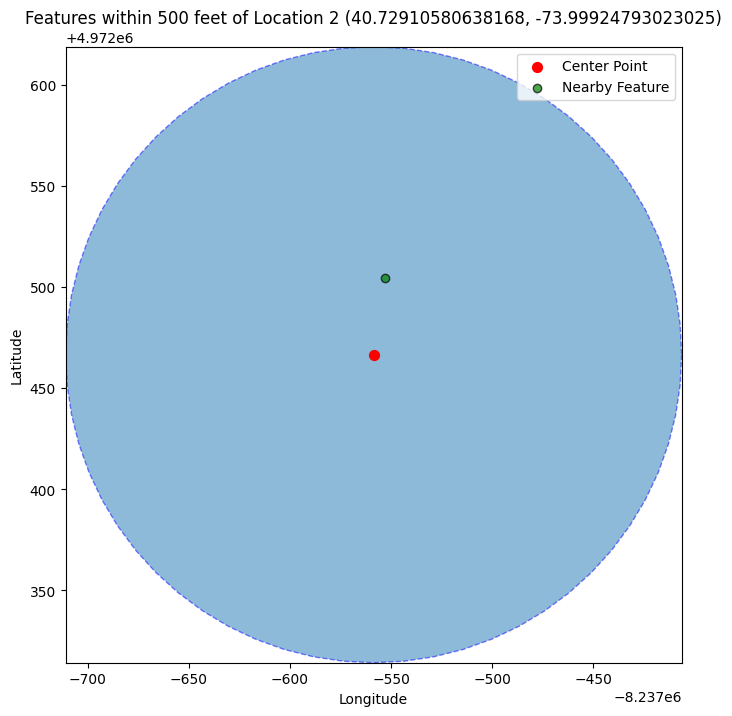

C:\Users\zheng\AppData\Local\Temp\ipykernel_58772\1761051754.py:67: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


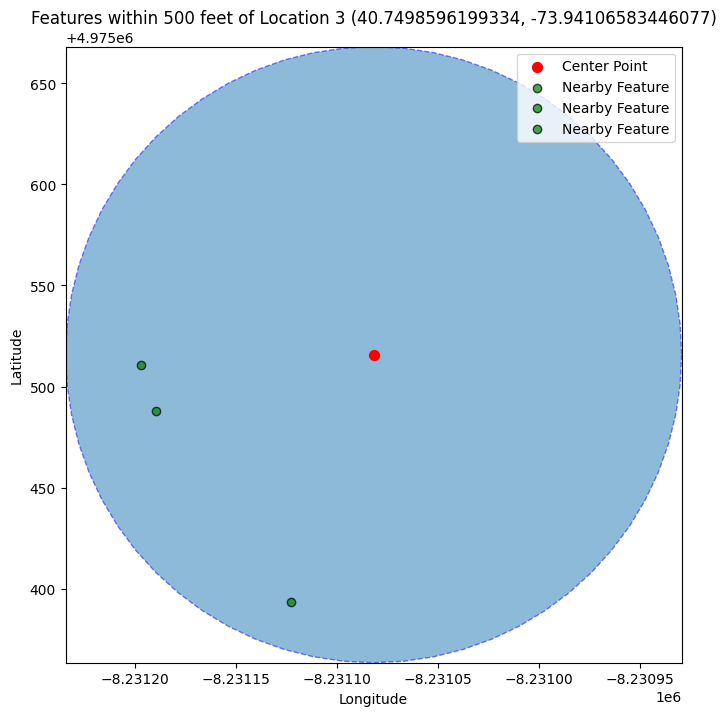

In [119]:
filepath = 'processed/open_space.geojson'  # Change this to your GeoJSON file path
visualize_geojson_results (filepath)

C:\Users\zheng\AppData\Local\Temp\ipykernel_37128\1761051754.py:67: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


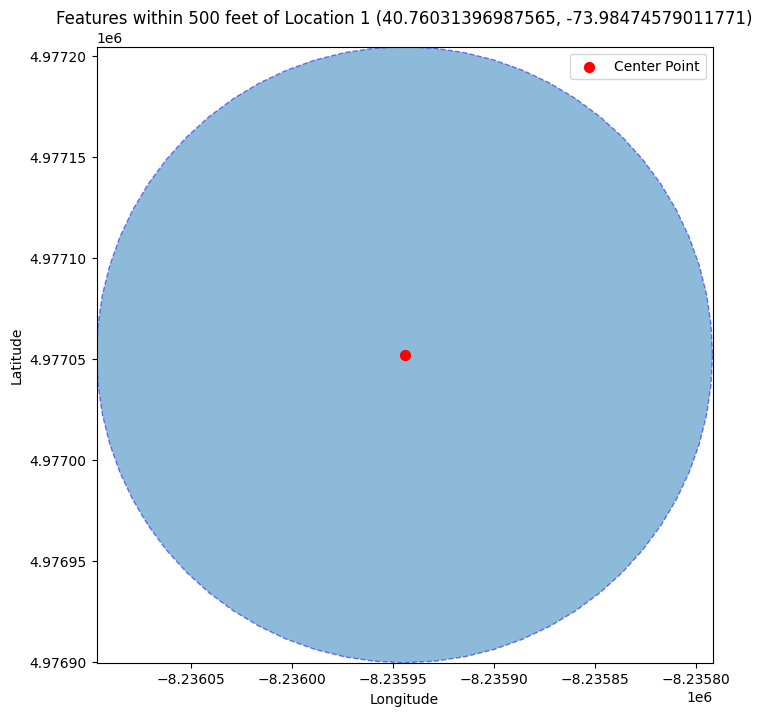

C:\Users\zheng\AppData\Local\Temp\ipykernel_37128\1761051754.py:67: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


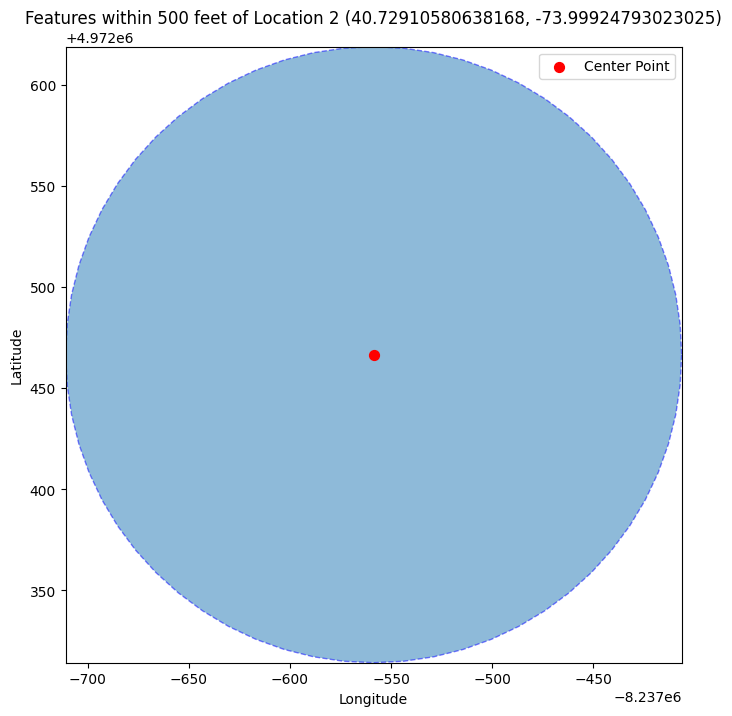

C:\Users\zheng\AppData\Local\Temp\ipykernel_37128\1761051754.py:67: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


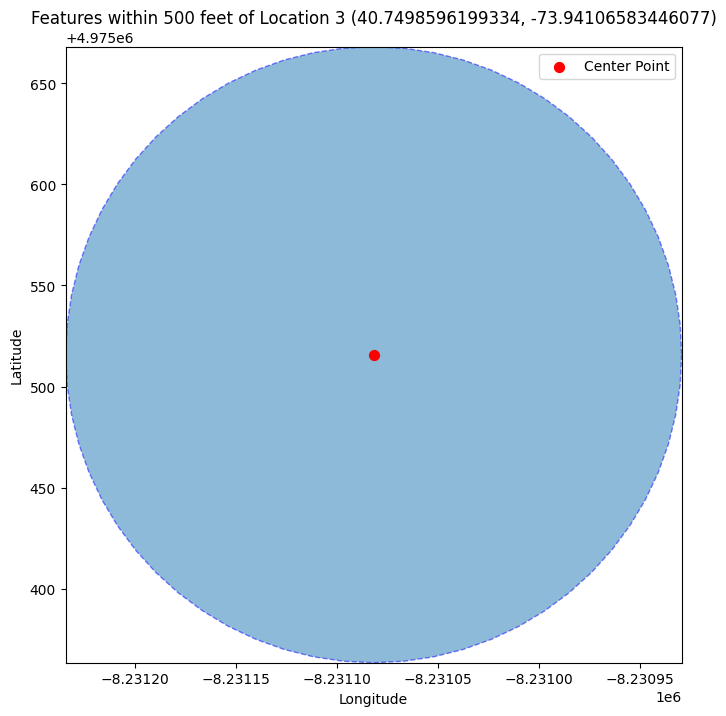

In [19]:
filepath = 'processed/residential_zones.geojson'  # Change this to your GeoJSON file path
visualize_geojson_results (filepath)

C:\Users\zheng\AppData\Local\Temp\ipykernel_58772\1761051754.py:67: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


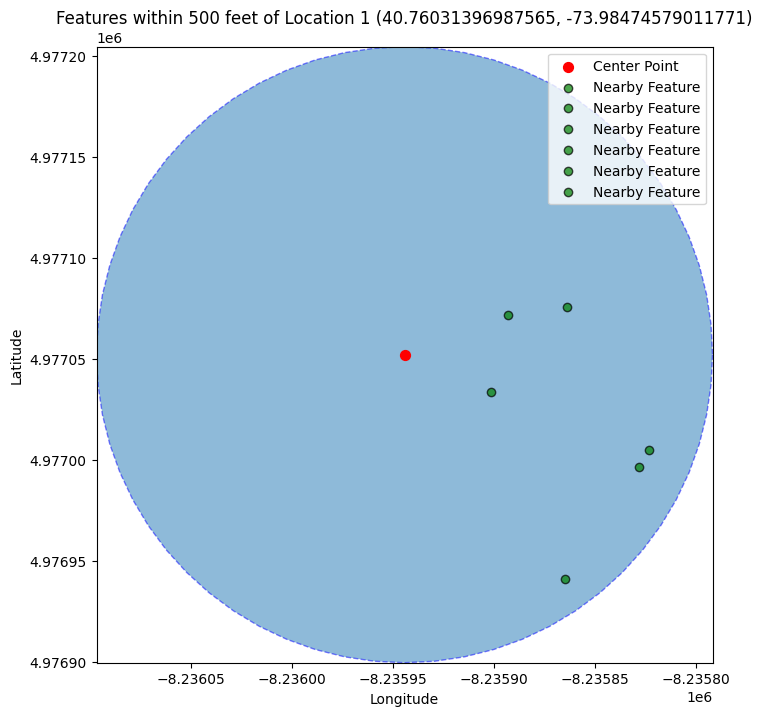

C:\Users\zheng\AppData\Local\Temp\ipykernel_58772\1761051754.py:67: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


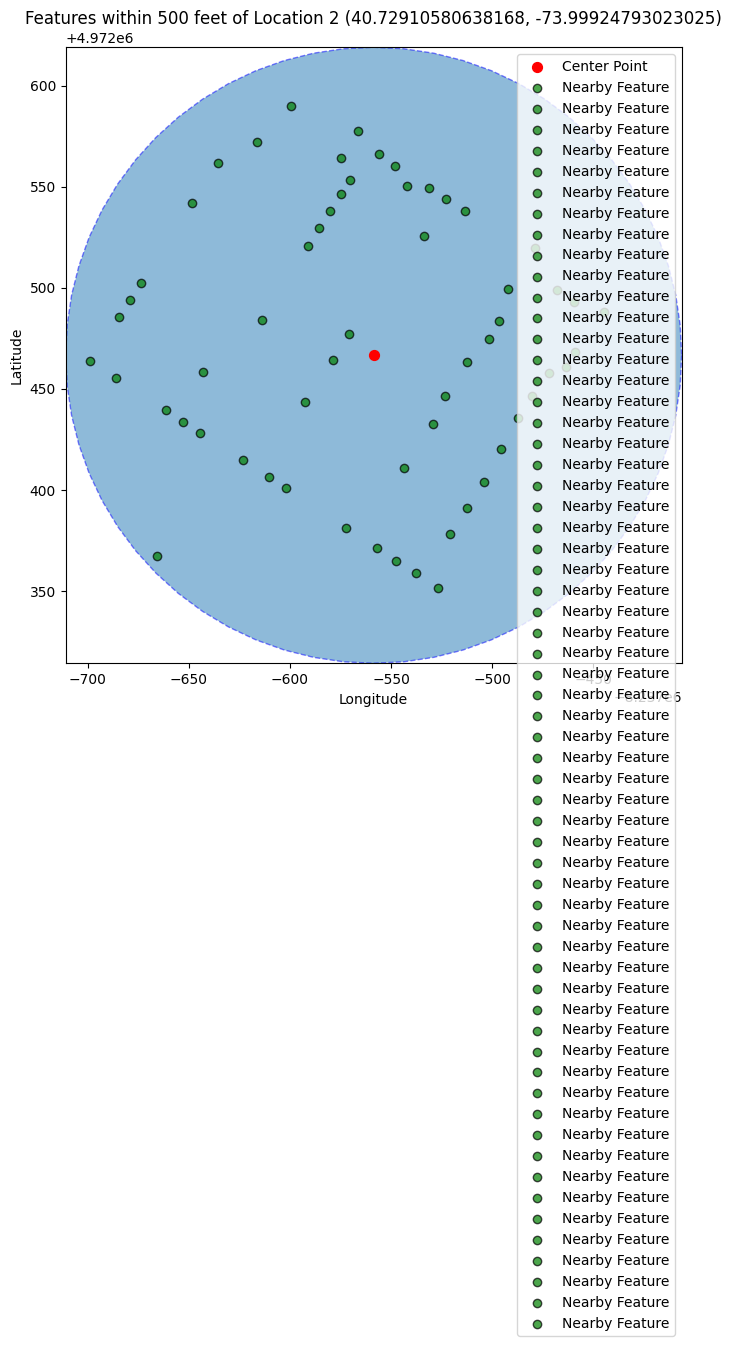

C:\Users\zheng\AppData\Local\Temp\ipykernel_58772\1761051754.py:67: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


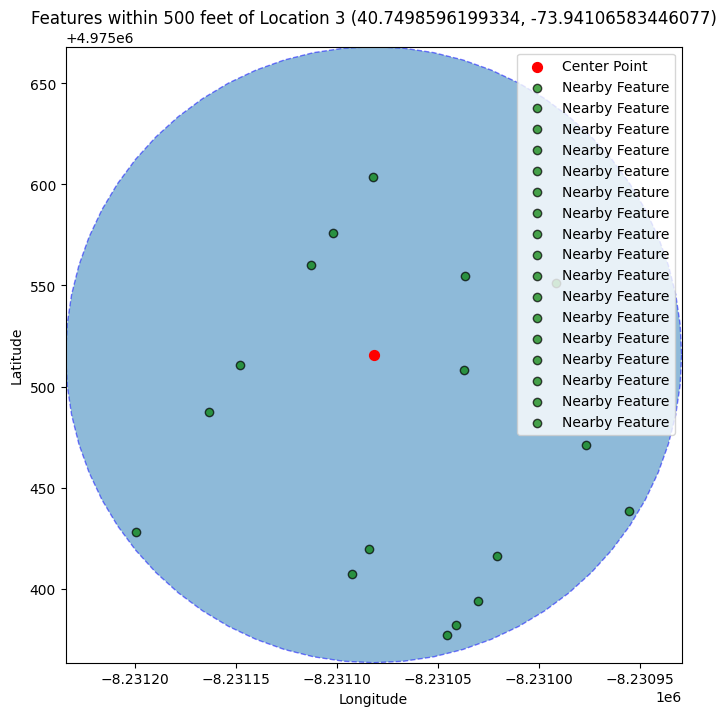

In [123]:
filepath = 'residential_buildings.geojson'  # Change this to your GeoJSON file path
visualize_geojson_results (filepath)

In [12]:
# Function to process a single GeoJSON file and collect results
def process_geojson_file(filepath):
    # Load the GeoJSON file
    gdf = gpd.read_file(filepath)
    
    # Check the CRS of the GeoDataFrame
    print("Original CRS:", gdf.crs)
    
    # If the CRS is not EPSG:4326, transform the GeoDataFrame to EPSG:4326
    if gdf.crs.to_string() != 'EPSG:4326':
        gdf = gdf.to_crs(epsg=4326)
        print("Transformed CRS to EPSG:4326")
    
    # Reproject the GeoDataFrame to EPSG:3857 (meters) for accurate buffer calculations
    gdf = gdf.to_crs(epsg=3857)
    
    # Create buffers for each location, reprojected to EPSG:3857
    buffers = []
    for lat, lon in locations:
        point = gpd.GeoSeries([Point(lon, lat)], crs="EPSG:4326").to_crs(epsg=3857)
        buffer = point.geometry[0].buffer(radius_meters)
        buffers.append(buffer)
    
    results = []
    
    # Iterate through buffers and find features within each buffer
    for i, buffer in enumerate(buffers):
        lat, lon = locations[i]
        nearby_features = gdf[gdf.intersects(buffer)]
        
        if not nearby_features.empty:
            print(f"Features found within 500 feet of Location {i+1} (Lat: {lat}, Lon: {lon}): {len(nearby_features)} features")
        else:
            print(f"No features found within 500 feet of Location {i+1} (Lat: {lat}, Lon: {lon})")
        
        for idx, row in nearby_features.iterrows():
            feature_info = {
                'Latitude': lat,
                'Longitude': lon,
                'Geometry Type': row.geometry.geom_type,
                **row.drop('geometry').to_dict()  # Extract all non-geometry properties
            }
            results.append(feature_info)
    
    return results

# Function to create a DataFrame and display the results
def display_geojson_results(filepath):
    # Process the GeoJSON file
    results = process_geojson_file(filepath)
    
    # Convert results to a DataFrame for easier visualization
    df = pd.DataFrame(results)
    
    if not df.empty:
        print(f"Features within 500 feet radius from the given locations in {filepath}:")
        print(df)
    else:
        print(f"No features found within 500 feet radius from the given locations in {filepath}.")

filepath = 'processed/Schools.geojson'  # Replace with your GeoJSON file path
display_geojson_results(filepath)

Original CRS: EPSG:3857
Transformed CRS to EPSG:4326
No features found within 500 feet of Location 1 (Lat: 40.76031396987565, Lon: -73.98474579011771)
No features found within 500 feet of Location 2 (Lat: 40.72910580638168, Lon: -73.99924793023025)
No features found within 500 feet of Location 3 (Lat: 40.7498596199334, Lon: -73.94106583446077)
No features found within 500 feet radius from the given locations in processed/Schools.geojson.
